<a href="https://colab.research.google.com/github/ulisesoldemar/CUD-classifier/blob/main/CUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesado

In [ ]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.set_cmap('gray')
import cv2
import glob

<Figure size 432x288 with 0 Axes>

In [ ]:
DATA_INPUT_PATH = '/content/drive/MyDrive/IAIM/project/volumes/'
IMG_INPUT_PATH = os.path.join(DATA_INPUT_PATH, 'img/')
MASK_INPUT_PATH = os.path.join(DATA_INPUT_PATH, 'mask/')

DATA_OUTPUT_PATH = '/content/drive/MyDrive/IAIM/project/slices/'
IMG_SLICE_OUTPUT_PATH = os.path.join(DATA_OUTPUT_PATH, 'img/')
MASK_SLICE_OUTPUT_PATH = os.path.join(DATA_OUTPUT_PATH, 'mask/')

In [ ]:
def normalize_image_intensity(img):
    lmin = img.min()
    lmax = img.max()
    return (img-lmin) / (lmax-lmin)

In [ ]:
def read_image_volume(path, normalize=False):
    img = nib.load(path).get_fdata()
    if normalize:
        return normalize_image_intensity(img)
    return img

In [ ]:
def save_slice(img, fname, path):
    img = np.uint(img * 255)
    fout = os.path.join(path, f'{fname}.png')
    cv2.imwrite(fout, img)
    print(f'\rCorte guardado: {fout}', end='')

In [ ]:
def slice_and_save_volume(vol, fname, path):
    y, x, z = vol.shape
    print('\nCortes en Y...')
    for i in range(y):
        save_slice(vol[i,:,:], fname+f'-slice{str(i).zfill(3)}_y', path)
    print('\nCortes en X...')
    for i in range(x):
        save_slice(vol[:,i,:], fname+f'-slice{str(i).zfill(3)}_x', path)
    print('\nCortes en Z...')
    for i in range(z):
        save_slice(vol[:,:,i], fname+f'-slice{str(i).zfill(3)}_z', path)
    return y+x+z

In [ ]:
# Se crean las carpetas en colab
!mkdir -p slices/{Test/{Abnormal,Normal},Train/{Abnormal,Normal}}

In [ ]:
DF_PATH = '/content/drive/MyDrive/IAIM/Proyecto/participants_volumes.csv'
DF_TRUE_PATH = '/content/drive/MyDrive/IAIM/Proyecto/true_male_predictions.csv'
IMG_PATH = '/content/drive/MyDrive/IAIM/Proyecto/anat/'

In [ ]:
from google.colab.data_table import DataTable
DataTable.max_columns = 30

In [ ]:
df = pd.read_table(DF_PATH, sep=',')
df

,participant_id,group,sex,age,educ,educ_yr,occup,income,civil_st,child,...,years.begin,coc.age.onset,days.last.use,week.dose,tobc.lastyear,tobc.day,tobc.totyears,exclusion,comm,volume
0,sub-001,1.0,1.0,41.0,7.0,22.0,7.0,20000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,1523989
1,sub-002,2.0,1.0,23.0,5.0,16.0,3.0,7100,6.0,0.0,...,5.0,18.0,56.0,2.0,1.0,1.0,10.0,1,rec_use,1325518
2,sub-003,2.0,1.0,27.0,5.0,16.0,4.0,12000,6.0,0.0,...,9.0,18.0,0.0,1.0,NaN,NaN,NaN,1,no_fMRI,1202082
3,sub-004,1.0,1.0,27.0,5.0,16.0,7.0,10000,6.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,8.0,1,no_fMRI,1397873
4,sub-005,1.0,1.0,23.0,5.0,16.0,7.0,6000,6.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,NaN,1354261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,sub-154,1.0,2.0,22.0,5.0,16.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,bpd,1369659
141,sub-156,1.0,1.0,21.0,3.0,12.0,NaN,NaN,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,bpd,1453696
142,sub-159,1.0,1.0,18.0,3.0,12.0,9.0,0,6.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1,bpd,1342006
143,sub-160,1.0,1.0,19.0,3.0,12.0,9.0,3200,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,bpd,1595372


In [ ]:
df.loc[(df['volume'] >= 1450*1000) & (df['group']==1)]

,participant_id,group,sex,age,educ,educ_yr,occup,income,civil_st,child,...,years.begin,coc.age.onset,days.last.use,week.dose,tobc.lastyear,tobc.day,tobc.totyears,exclusion,comm,volume
0,sub-001,1.0,1.0,41.0,7.0,22.0,7.0,20000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,1523989
21,sub-022,1.0,1.0,26.0,5.0,16.0,6.0,4000,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,1450506
27,sub-028,1.0,1.0,43.0,5.0,16.0,4.0,16000,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,1668990
30,sub-031,1.0,1.0,38.0,5.0,16.0,4.0,16000,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,1527194
31,sub-032,1.0,1.0,38.0,3.0,12.0,6.0,16000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,1477544
35,sub-036,1.0,1.0,23.0,3.0,12.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,9.0,0,NaN,1512370
39,sub-041,1.0,1.0,35.0,3.0,12.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,3.0,14.0,1,alc_dep,1601670
40,sub-042,1.0,1.0,22.0,3.0,12.0,1.0,NaN,6.0,0.0,...,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0,NaN,1453176
42,sub-044,1.0,1.0,30.0,1.0,6.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,20.0,0,NaN,1549321
47,sub-049,1.0,1.0,35.0,5.0,16.0,3.0,16000,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,0.0,13.0,0,NaN,1639604


In [ ]:
df.loc[df['volume'] < 1450*1000]

,participant_id,group,sex,age,educ,educ_yr,occup,income,civil_st,child,...,years.begin,coc.age.onset,days.last.use,week.dose,tobc.lastyear,tobc.day,tobc.totyears,exclusion,comm,volume
1,sub-002,2.0,1.0,23.0,5.0,16.0,3.0,7100,6.0,0.0,...,5.0,18.0,56.0,2.0,1.0,1.0,10.0,1,rec_use,1325518
2,sub-003,2.0,1.0,27.0,5.0,16.0,4.0,12000,6.0,0.0,...,9.0,18.0,0.0,1.0,NaN,NaN,NaN,1,no_fMRI,1202082
3,sub-004,1.0,1.0,27.0,5.0,16.0,7.0,10000,6.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,8.0,1,no_fMRI,1397873
4,sub-005,1.0,1.0,23.0,5.0,16.0,7.0,6000,6.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,NaN,1354261
6,sub-007,1.0,1.0,28.0,4.0,14.0,4.0,10000,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,1409767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,sub-149,2.0,1.0,21.0,2.0,9.0,7.0,500,6.0,0.0,...,NaN,NaN,1.0,4.0,NaN,NaN,NaN,1,abst,1389020
139,sub-153,1.0,2.0,34.0,5.0,16.0,NaN,5500,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,bpd,1146031
140,sub-154,1.0,2.0,22.0,5.0,16.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,bpd,1369659
142,sub-159,1.0,1.0,18.0,3.0,12.0,9.0,0,6.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1,bpd,1342006


In [ ]:
df_true = pd.read_table(DF_TRUE_PATH, sep=',')
df_true

,participant_id,group,sex,age,educ,educ_yr,occup,income,civil_st,child,...,years.begin,coc.age.onset,days.last.use,week.dose,tobc.lastyear,tobc.day,tobc.totyears,exclusion,comm,volume
0,sub-002,2.0,1.0,23.0,5.0,16.0,3.0,7100.0,6.0,0.0,...,5.0,18.0,56.0,2.0,1.0,1.0,10.0,1,rec_use,1325518
1,sub-003,2.0,1.0,27.0,5.0,16.0,4.0,12000.0,6.0,0.0,...,9.0,18.0,0.0,1.0,NaN,NaN,NaN,1,no_fMRI,1202082
2,sub-008,2.0,1.0,37.0,2.0,9.0,4.0,4000.0,6.0,1.0,...,21.0,15.0,13.0,0.0,1.0,1.0,20.0,0,NaN,1333233
3,sub-010,2.0,1.0,23.0,4.0,14.0,3.0,0.0,6.0,1.0,...,2.0,20.0,1.0,2.0,1.0,1.0,4.0,0,NaN,1311560
4,sub-011,2.0,1.0,33.0,1.0,6.0,3.0,400.0,2.0,1.0,...,16.0,17.0,18.0,3.0,1.0,4.0,8.0,1,rec_use,1342598
5,sub-014,2.0,1.0,39.0,2.0,9.0,5.0,12800.0,2.0,1.0,...,15.0,24.0,13.0,3.0,1.0,3.0,25.0,0,NaN,1423852
6,sub-016,2.0,1.0,45.0,4.0,14.0,3.0,0.0,6.0,0.0,...,28.0,17.0,5.0,3.0,1.0,1.0,31.0,0,NaN,1394118
7,sub-017,2.0,1.0,35.0,2.0,9.0,3.0,0.0,2.0,1.0,...,13.0,22.0,7.0,2.0,1.0,1.0,3.0,0,NaN,1391765
8,sub-019,2.0,1.0,38.0,3.0,12.0,3.0,6000.0,4.0,0.0,...,15.0,23.0,7.0,1.0,1.0,1.0,14.0,0,NaN,1418499
9,sub-020,2.0,1.0,35.0,4.0,14.0,4.0,4000.0,6.0,1.0,...,17.0,18.0,1.0,1.0,1.0,3.0,21.0,0,NaN,1250435


In [ ]:
df_true[['participant_id', 'group', 'sex']]

,participant_id,group,sex
0,sub-002,2.0,1.0
1,sub-003,2.0,1.0
2,sub-008,2.0,1.0
3,sub-010,2.0,1.0
4,sub-011,2.0,1.0
5,sub-014,2.0,1.0
6,sub-016,2.0,1.0
7,sub-017,2.0,1.0
8,sub-019,2.0,1.0
9,sub-020,2.0,1.0


In [ ]:
df_hc = df.loc[(df['volume'] > 1450*1000) & (df['sex']==1)][:40]
df_hc

,participant_id,group,sex,age,educ,educ_yr,occup,income,civil_st,child,...,years.begin,coc.age.onset,days.last.use,week.dose,tobc.lastyear,tobc.day,tobc.totyears,exclusion,comm,volume
0,sub-001,1.0,1.0,41.0,7.0,22.0,7.0,20000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,1523989
5,sub-006,2.0,1.0,27.0,4.0,14.0,4.0,6000,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,no_fMRI,1604917
8,sub-009,2.0,1.0,31.0,2.0,9.0,4.0,2400,4.0,1.0,...,4.0,27.0,33.0,1.0,1.0,2.0,20.0,0,NaN,1556428
12,sub-013,2.0,1.0,36.0,4.0,14.0,6.0,8000,1.0,1.0,...,20.0,16.0,NaN,2.0,NaN,NaN,NaN,0,NaN,1505117
14,sub-015,2.0,1.0,28.0,5.0,16.0,7.0,15000,4.0,1.0,...,12.0,16.0,33.0,2.0,1.0,1.0,16.0,0,NaN,1458094
17,sub-018,2.0,1.0,34.0,4.0,14.0,7.0,10000,6.0,0.0,...,15.0,19.0,16.0,1.0,0.0,0.0,0.0,0,NaN,1635859
21,sub-022,1.0,1.0,26.0,5.0,16.0,6.0,4000,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,1450506
23,sub-024,2.0,1.0,18.0,3.0,12.0,1.0,800,6.0,0.0,...,2.0,16.0,2.0,3.0,1.0,1.0,3.0,0,NaN,1477428
24,sub-025,2.0,1.0,24.0,4.0,14.0,3.0,3000,4.0,1.0,...,1.0,23.0,2.0,2.0,1.0,1.0,9.0,0,NaN,1738659
27,sub-028,1.0,1.0,43.0,5.0,16.0,4.0,16000,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,1668990


## Pacientes con CUD

### Training

In [ ]:
from skimage.transform import resize
for index, filename in enumerate(sorted(df_true['participant_id'])[:28]):
    fname = f'{IMG_PATH}{filename}_T1w.nii.gz'
    img = read_image_volume(fname, True)
    img = resize(img, (180, 240, 240), order=0)
    n_slices = slice_and_save_volume(img, 'brain'+str(index), '/content/slices/Train/Abnormal')
    print(f'\r{index}', end='')


Cortes en Y...
Corte guardado: /content/slices/Train/Abnormal/brain0-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Train/Abnormal/brain0-slice239_x.png
Cortes en Z...
0
Cortes en Y...
Corte guardado: /content/slices/Train/Abnormal/brain1-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Train/Abnormal/brain1-slice239_x.png
Cortes en Z...
1
Cortes en Y...
Corte guardado: /content/slices/Train/Abnormal/brain2-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Train/Abnormal/brain2-slice239_x.png
Cortes en Z...
2
Cortes en Y...
Corte guardado: /content/slices/Train/Abnormal/brain3-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Train/Abnormal/brain3-slice239_x.png
Cortes en Z...
3
Cortes en Y...
Corte guardado: /content/slices/Train/Abnormal/brain4-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Train/Abnormal/brain4-slice239_x.png
Cortes en Z...
4
Cortes en Y...
Corte guardado: /content/slices/Train/Abnormal/brain5-slice

### Test

In [ ]:
from skimage.transform import resize
for index, filename in enumerate(sorted(df_true['participant_id'])[28:]):
    fname = f'{IMG_PATH}{filename}_T1w.nii.gz'
    img = read_image_volume(fname, True)
    img = resize(img, (180, 240, 240), order=0)
    n_slices = slice_and_save_volume(img, 'brain'+str(index), '/content/slices/Test/Abnormal')
    print(f'\r{index}', end='')


Cortes en Y...
Corte guardado: /content/slices/Test/Abnormal/brain0-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Test/Abnormal/brain0-slice239_x.png
Cortes en Z...
0
Cortes en Y...
Corte guardado: /content/slices/Test/Abnormal/brain1-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Test/Abnormal/brain1-slice239_x.png
Cortes en Z...
1
Cortes en Y...
Corte guardado: /content/slices/Test/Abnormal/brain2-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Test/Abnormal/brain2-slice239_x.png
Cortes en Z...
2
Cortes en Y...
Corte guardado: /content/slices/Test/Abnormal/brain3-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Test/Abnormal/brain3-slice239_x.png
Cortes en Z...
3
Cortes en Y...
Corte guardado: /content/slices/Test/Abnormal/brain4-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Test/Abnormal/brain4-slice239_x.png
Cortes en Z...
4
Cortes en Y...
Corte guardado: /content/slices/Test/Abnormal/brain5-slice179_y.png
C

## Pacientes sanos

### Training

In [ ]:
from skimage.transform import resize
for index, filename in enumerate(sorted(df_hc['participant_id'])[:28]):
    fname = f'{IMG_PATH}{filename}_T1w.nii.gz'
    img = read_image_volume(fname, True)
    img = resize(img, (180, 240, 240), order=0)
    n_slices = slice_and_save_volume(img, 'brain'+str(index), '/content/slices/Train/Normal')
    print(f'\r{index}', end='')


Cortes en Y...
Corte guardado: /content/slices/Train/Normal/brain0-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Train/Normal/brain0-slice239_x.png
Cortes en Z...
0
Cortes en Y...
Corte guardado: /content/slices/Train/Normal/brain1-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Train/Normal/brain1-slice239_x.png
Cortes en Z...
1
Cortes en Y...
Corte guardado: /content/slices/Train/Normal/brain2-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Train/Normal/brain2-slice239_x.png
Cortes en Z...
2
Cortes en Y...
Corte guardado: /content/slices/Train/Normal/brain3-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Train/Normal/brain3-slice239_x.png
Cortes en Z...
3
Cortes en Y...
Corte guardado: /content/slices/Train/Normal/brain4-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Train/Normal/brain4-slice239_x.png
Cortes en Z...
4
Cortes en Y...
Corte guardado: /content/slices/Train/Normal/brain5-slice179_y.png
Cortes en X.

### Test

In [ ]:
from skimage.transform import resize
for index, filename in enumerate(sorted(df_hc['participant_id'])[28:]):
    fname = f'{IMG_PATH}{filename}_T1w.nii.gz'
    img = read_image_volume(fname, True)
    img = resize(img, (180, 240, 240), order=0)
    n_slices = slice_and_save_volume(img, 'brain'+str(index), '/content/slices/Test/Normal')
    print(f'\r{index}', end='')


Cortes en Y...
Corte guardado: /content/slices/Test/Normal/brain0-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Test/Normal/brain0-slice239_x.png
Cortes en Z...
0
Cortes en Y...
Corte guardado: /content/slices/Test/Normal/brain1-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Test/Normal/brain1-slice239_x.png
Cortes en Z...
1
Cortes en Y...
Corte guardado: /content/slices/Test/Normal/brain2-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Test/Normal/brain2-slice239_x.png
Cortes en Z...
2
Cortes en Y...
Corte guardado: /content/slices/Test/Normal/brain3-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Test/Normal/brain3-slice239_x.png
Cortes en Z...
3
Cortes en Y...
Corte guardado: /content/slices/Test/Normal/brain4-slice179_y.png
Cortes en X...
Corte guardado: /content/slices/Test/Normal/brain4-slice239_x.png
Cortes en Z...
4
Cortes en Y...
Corte guardado: /content/slices/Test/Normal/brain5-slice179_y.png
Cortes en X...
Corte gu

# Entrenamiento

In [ ]:
import os
import matplotlib.pyplot as plt
plt.set_cmap('gray')

import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model

<Figure size 432x288 with 0 Axes>

In [ ]:
SEED = 909
BATCH_SIZE_TRAIN = 32
BATCH_SIZE_TEST = 32

IMG_HEIGHT = 120
IMG_WIDTH = 120
IMG_SIZE = IMG_HEIGHT, IMG_WIDTH

DATA_DIR = '/content/slices/'

DATA_DIR_TRAIN = os.path.join(DATA_DIR, 'Train')
DATA_DIR_TRAIN_ABNORMAL = os.path.join(DATA_DIR_TRAIN, 'Abnormal')
DATA_DIR_TRAIN_NORMAL = os.path.join(DATA_DIR_TRAIN, 'Normal')

DATA_DIR_TEST = os.path.join(DATA_DIR, 'Test')
DATA_DIR_TEST_ABNORMAL = os.path.join(DATA_DIR_TEST, 'Abnormal')
DATA_DIR_TEST_NORMAL = os.path.join(DATA_DIR_TEST, 'Normal')

In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory('/content/slices/Train/',
                                          target_size=(120, 120),
                                          batch_size=32,
                                          class_mode='binary',
                                          color_mode='grayscale')

test_dataset = test.flow_from_directory('/content/slices/Test/',
                                        target_size=(120, 120),
                                        batch_size=32,
                                        class_mode='binary',
                                        color_mode='grayscale')

Found 36960 images belonging to 2 classes.
Found 15840 images belonging to 2 classes.


In [ ]:
def get_model():
    model = keras.Sequential()

    # Convolutional layer and maxpool layer 1
    model.add(keras.layers.Conv2D(32, (3, 3),activation='relu',input_shape=(120, 120, 1)))
    model.add(keras.layers.MaxPool2D(2, 2))

    # Convolutional layer and maxpool layer 2
    model.add(keras.layers.Conv2D(64, (3, 3),activation='relu'))
    model.add(keras.layers.MaxPool2D(2, 2))

    # Convolutional layer and maxpool layer 3
    model.add(keras.layers.Conv2D(128, (3, 3),activation='relu'))
    model.add(keras.layers.MaxPool2D(2, 2))

    # Convolutional layer and maxpool layer 4
    model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
    model.add(keras.layers.MaxPool2D(2, 2))

    # This layer flattens the resulting image array to 1D array
    model.add(keras.layers.Flatten())

    # Hidden layer with 512 neurons and Rectified Linear Unit activation function
    model.add(keras.layers.Dense(512, activation='relu'))

    # Output layer with single neuron which gives 0 for Cat or 1 for Dog
    # Here we use sigmoid activation function which makes our model output to lie between 0 and 1
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    return model

NUM_TRAIN = 18480
NUM_TEST = 7920

EPOCH_STEP_TRAIN = NUM_TRAIN // BATCH_SIZE_TRAIN
EPOCH_STEP_TEST = NUM_TEST // BATCH_SIZE_TEST

EPOCH_STEP_TRAIN = NUM_TRAIN // BATCH_SIZE_TRAIN
EPOCH_STEP_TEST = NUM_TEST // BATCH_SIZE_TEST

model = get_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
NUM_OF_EPOCHS = 50

# Callbacks
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "CNN-L5-F32.h5", save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30)

history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    steps_per_epoch=EPOCH_STEP_TRAIN,
    validation_steps=EPOCH_STEP_TEST,
    epochs=NUM_OF_EPOCHS,
    callbacks=[checkpoint_cb, early_stopping_cb],
    shuffle=True,
    )

Epoch 1/50
577/577 [==============================] - 26s 44ms/step - loss: 0.5528 - accuracy: 0.6929 - val_loss: 0.6220 - val_accuracy: 0.6955
Epoch 2/50
577/577 [==============================] - 30s 53ms/step - loss: 0.3874 - accuracy: 0.7987 - val_loss: 0.6700 - val_accuracy: 0.7181
Epoch 3/50
577/577 [==============================] - 28s 48ms/step - loss: 0.2860 - accuracy: 0.8531 - val_loss: 0.9317 - val_accuracy: 0.7023
Epoch 4/50
577/577 [==============================] - 24s 42ms/step - loss: 0.2308 - accuracy: 0.8824 - val_loss: 1.2487 - val_accuracy: 0.7112
Epoch 5/50
410/577 [====================>.........] - ETA: 5s - loss: 0.1983 - accuracy: 0.8959

In [ ]:
model.save(f'/content/drive/MyDrive/IAIM/project/CNN-CUD_Classification_Grayscale{IMG_HEIGHT}_{IMG_WIDTH}_.h5')

In [ ]:
model = load_model(f'/content/drive/MyDrive/IAIM/project/CNN-CUD_Classification_Grayscale{IMG_HEIGHT}_{IMG_WIDTH}_.h5')

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 118, 118, 32)      320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 59, 59, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 28, 28, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 13, 13, 128)     

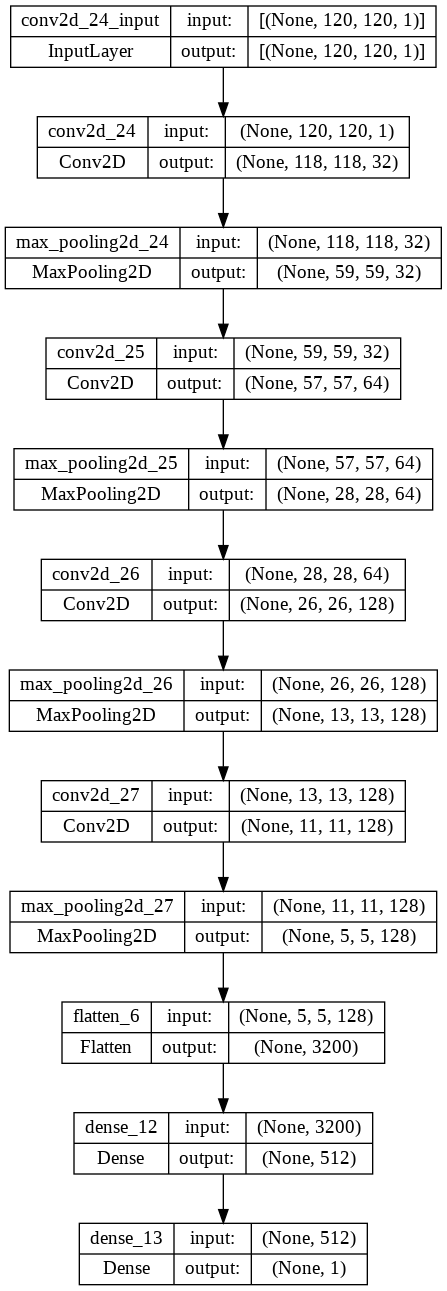

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

# Validación

In [ ]:
def scale_img(img, height, width):
    return cv2.resize(img, dsize=(width, height), interpolation=cv2.INTER_LINEAR)

In [ ]:
def predict_img(img2d):
    img2d = scale_img(img2d, IMG_HEIGHT, IMG_WIDTH)
    X = np.expand_dims(img2d, axis=0)
    val = model.predict(X, verbose=0)
    return val

In [ ]:
from skimage.transform import resize

In [ ]:
img = nib.load('/content/drive/MyDrive/IAIM/Proyecto/anat/sub-025_T1w.nii.gz').get_fdata()
img = normalize_image_intensity(img)
img.shape

(180, 240, 240)

In [ ]:
img2d = img[1,:,:]
val = predict_img(img2d)
val

array([[0.9999951]], dtype=float32)

In [ ]:
def predict_volume(input_img):
    y_max, x_max, z_max = input_img.shape

    total_y = 0.0
    total_z = 0.0
    total_x = 0.0

    print('Cortes en Y...')
    for i in range(y_max):
        print(f'\r{i+1}/{y_max}', end='')
        img = scale_img(input_img[i,:,:], IMG_HEIGHT, IMG_WIDTH)
        total_y += predict_img(img)

    print('\nCortes en X...')
    for i in range(x_max):
        print(f'\r{i+1}/{x_max}', end='')
        img = scale_img(input_img[:,i,:], IMG_HEIGHT, IMG_WIDTH)
        total_x += predict_img(img)

    print('\nCortes en Z...')
    for i in range(z_max):
        print(f'\r{i+1}/{z_max}', end='')
        img = scale_img(input_img[:,:,i], IMG_HEIGHT, IMG_WIDTH)
        total_z += predict_img(img)

    avg_y = total_y / y_max
    avg_x = total_x / x_max
    avg_z = total_z / z_max

    return (avg_y + avg_x + avg_z) / 3.0

In [ ]:
pred = predict_volume(img)

Cortes en Y...
180/180
Cortes en X...
240/240
Cortes en Z...
240/240

In [ ]:
pred, 1 - pred

(array([[0.97147155]], dtype=float32), array([[0.02852845]], dtype=float32))

In [ ]:
preds = model.predict(test_dataset)

495/495 [==============================] - 156s 314ms/step


In [ ]:
test_dataset.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
test_dataset.class_indices.keys()

dict_keys(['Abnormal', 'Normal'])

In [ ]:
confusion = tf.math.confusion_matrix(labels=test_dataset.labels, predictions=preds)

[Text(0, 0.5, 'Abnormal'), Text(0, 1.5, 'Normal')]

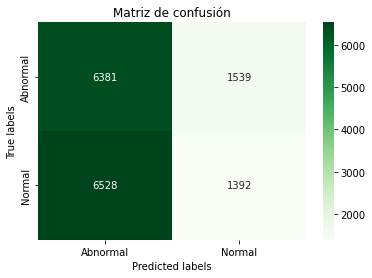

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.subplot()
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g', ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Matriz de confusión')
ax.xaxis.set_ticklabels(test_dataset.class_indices.keys())
ax.yaxis.set_ticklabels(test_dataset.class_indices.keys())

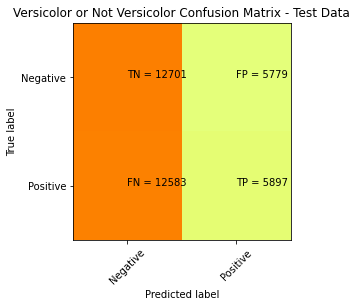

In [ ]:
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Wistia)
class_names = ['Anormal','Normal']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('Verdadera etiqueta')
plt.xlabel('Predicción')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
s = [['TN','FP'], ['FN', 'TP']]
confusion_array = confusion.numpy()
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+" = "+str(confusion_array[i][j]))
plt.show()